In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [49]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.rcParams.update({'font.size': 18})

# Create a simple signal with two frequencies
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) # Sum of 2 frequencies
f_clean = f
f = f + 2.5*np.random.randn(len(t))# Add some noise


array([ 0.00000000e+00,  9.93564100e-01,  1.58581198e+00,  1.57953024e+00,
        1.07638975e+00,  4.12214748e-01, -3.12307344e-02, -3.53109311e-02,
        3.39095365e-01,  7.90770668e-01,  9.51056516e-01,  5.95810058e-01,
       -2.19660700e-01, -1.17714155e+00, -1.85588357e+00, -1.95105652e+00,
       -1.43281019e+00, -5.60327107e-01,  2.56542673e-01,  6.73270256e-01,
        5.87785252e-01,  1.83683761e-01, -1.82727990e-01, -1.89009734e-01,
        2.66509410e-01,  1.00000000e+00,  1.63560362e+00,  1.80704372e+00,
        1.35829850e+00,  4.34350228e-01, -5.87785252e-01, -1.29130425e+00,
       -1.43211318e+00, -1.05770688e+00, -4.69302842e-01, -4.89434837e-02,
       -4.62294638e-02, -4.40892442e-01, -9.55909805e-01, -1.21384405e+00,
       -9.51056516e-01, -1.72736680e-01,  8.36475139e-01,  1.65334492e+00,
        1.93334377e+00,  1.58778525e+00,  8.25723283e-01,  3.85037516e-02,
       -4.10241476e-01, -3.75530112e-01, -2.63360960e-15,  3.75530112e-01,
        4.10241476e-01, -

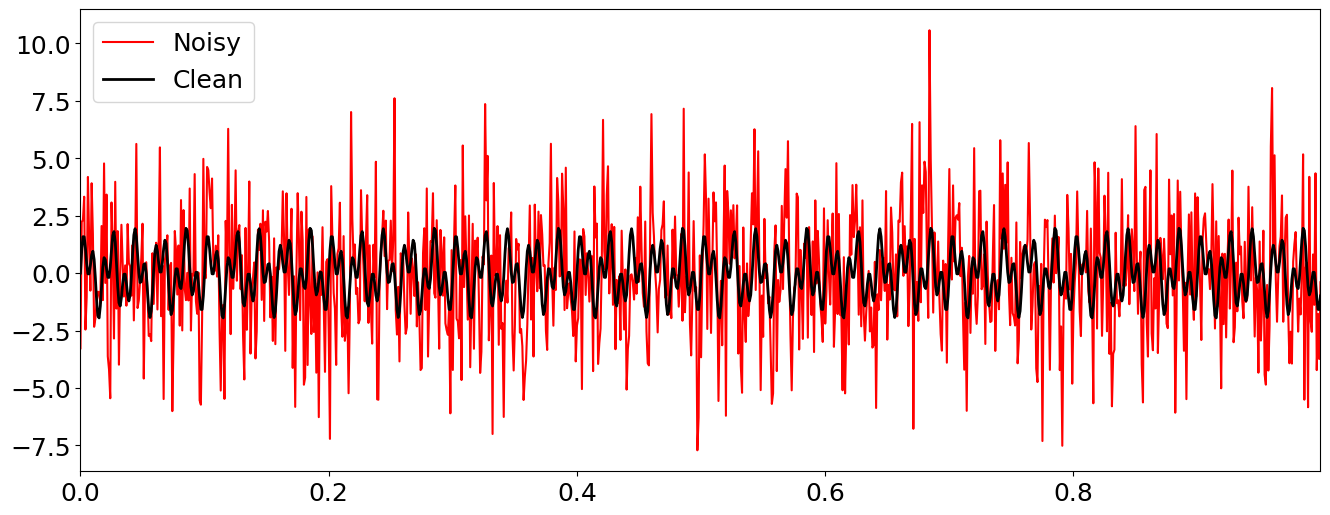

In [26]:
fig = plt.figure()

plt.plot(t,f,color='r',linewidth=1.5,label='Noisy')
plt.plot(t,f_clean,color='k',linewidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()
plt.show()
#we will get given the noisy data and will want to find the clean data using the FFT


In [1]:
# Compute the Fast Fourier Transform (FFT)

n = len(t)
fhat = np.fft.fft(f,n)                     # Compute the FFT
PSD = fhat * np.conj(fhat) / n             # Power spectrum (power per freq):this finds the magnitude of each fourier coefficient squared.
#if f is a function of time, then can assume this is connected to power=work/time
freq = (1/(dt*n)) * np.arange(n)           # Create x-axis of frequencies in Hz
L = np.arange(1,np.floor(n/2),dtype='int') # Only plot the first half of freqs


NameError: name 't' is not defined

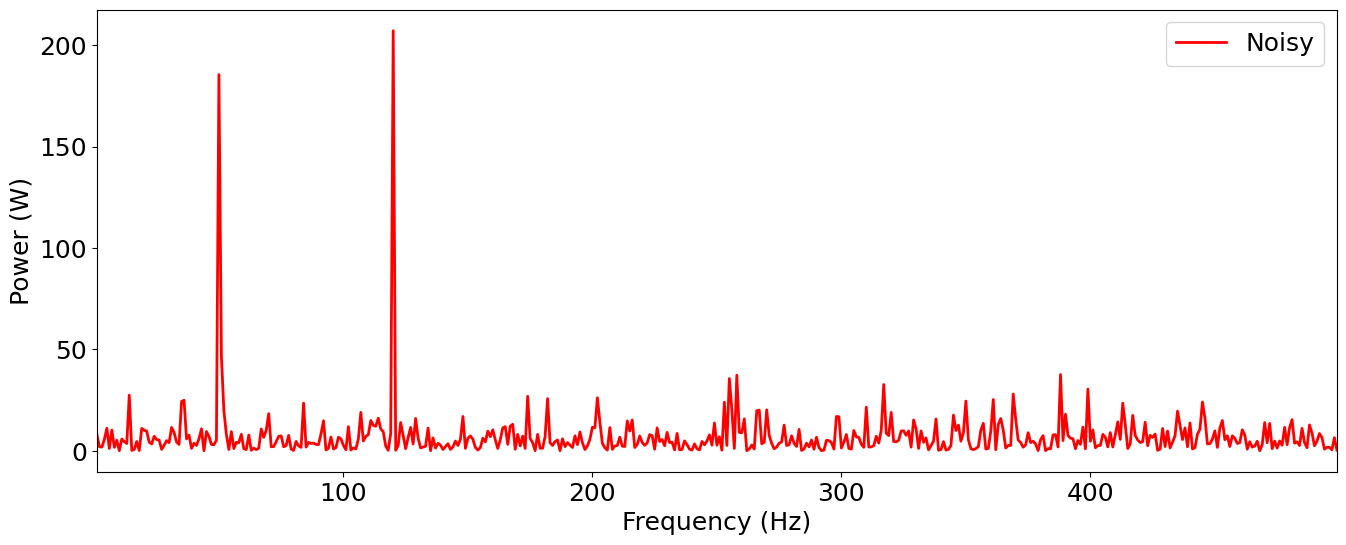

In [42]:
plt.figure()
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()
#we can filter this data to just include fourier coefficients with high powers. Remove small fourier coefficients

In [57]:
## Use the PSD to filter out noise
indices = PSD > 100       # Find all freqs with large power (so just plot high power densities in graph below)
PSDclean = PSD * indices  # Zero out all others
fhat = indices * fhat     # Zero out small Fourier coeffs. in Y
ffilt = np.fft.ifft(fhat)
PSD[0]# Inverse FFT for filtered time signal

(9.14547370062603+0j)

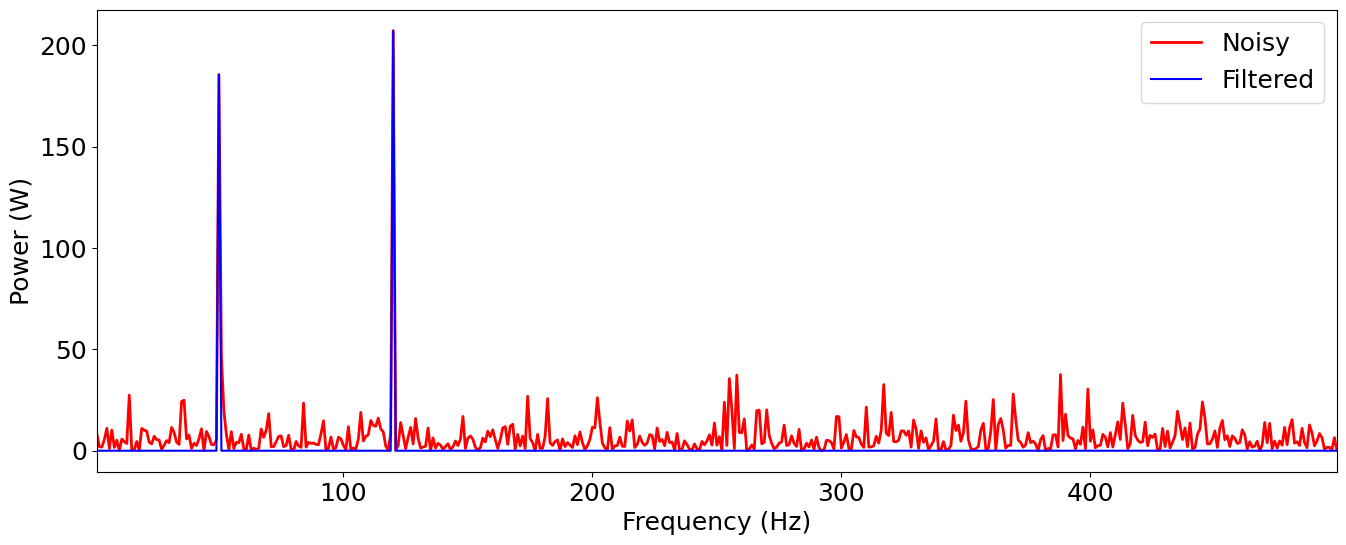

In [44]:
plt.figure()
plt.plot(freq[L],PSD[L],color='r',linewidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='b',linewidth=1.5,label='Filtered')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (W)')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()
#This shows our power spectral density as a function of frequency
# so it tells you how much of each frequency is in the data
#most of power is at 50 and 120 Hz

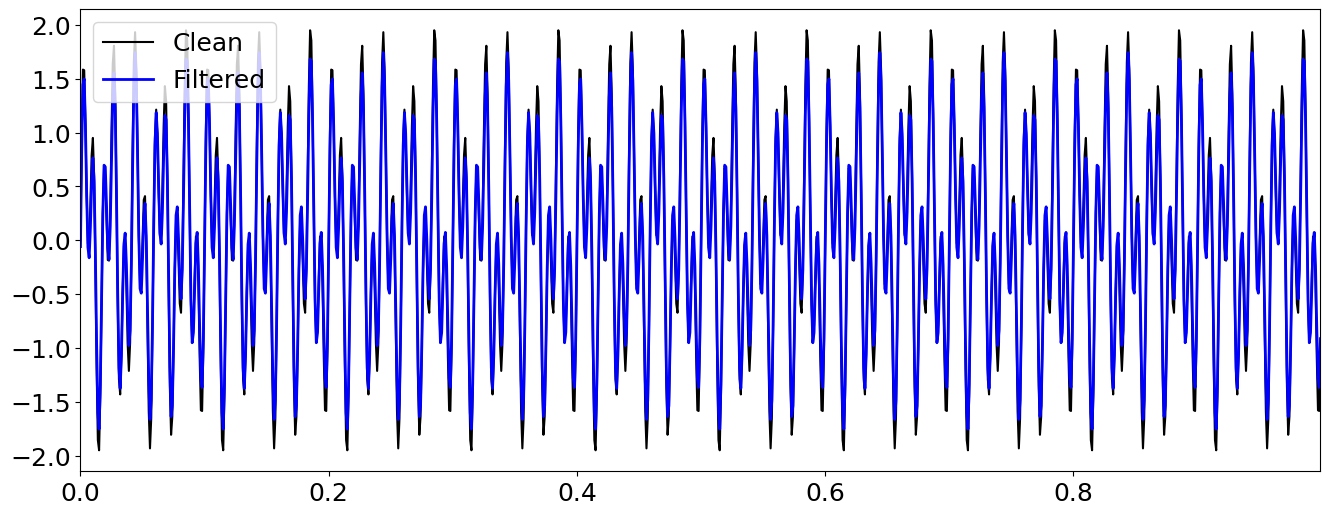

In [39]:
plt.figure()
plt.plot(t,f_clean,color='k',linewidth=1.5,label='Clean')
plt.plot(t,ffilt,color='b',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()
#plot the filtered data after we have inverse fourier transformed it. 
#Filtered here is the approximation of the sum of 50 and 120 Hz, the black clean graph.